In [1]:
%cd ..

/home/ubuntu/dev/py-edge-eval


# Cityscapes dataset

In [2]:
import os

# imports
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
# %matplotlib widget

In [23]:
%load_ext autoreload
%autoreload 2

# debug

In [4]:
# data:
ROOT = os.path.join('data', 'cityscapes')
gtFine = os.path.join(ROOT, 'gtFine')
gtEval = os.path.join(ROOT, 'gtEval')

# extensions:
img_ext = "gtFine_color.png"
inst_ext = "gtFine_instanceIds.png"
label_ext = "gtFine_labelIds.png"
poly_ext = "gtFine_polygons.json"

In [5]:
# sampe:
split = 'val'
city = "frankfurt"
frameid = "000000_000576"

img_path = os.path.join(gtFine, split, city, f"{city}_{frameid}_{img_ext}")

label_path = os.path.join(gtFine, split, city, f"{city}_{frameid}_{label_ext}")
inst_path = os.path.join(gtFine, split, city, f"{city}_{frameid}_{inst_ext}")

assert os.path.exists(img_path) and os.path.exists(label_path) and os.path.exists(inst_path)

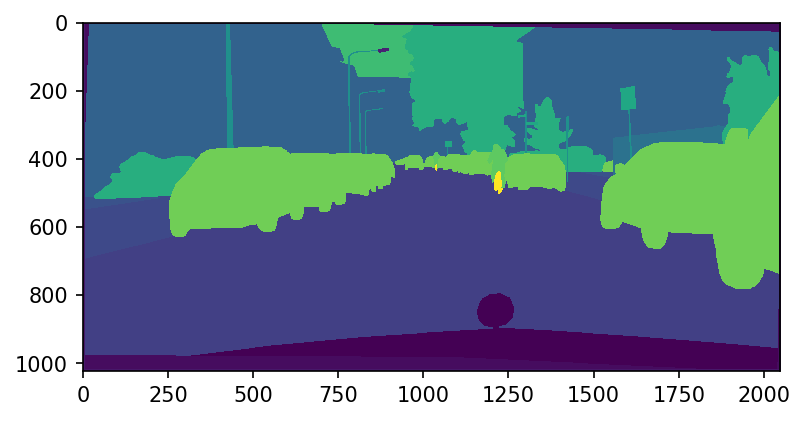

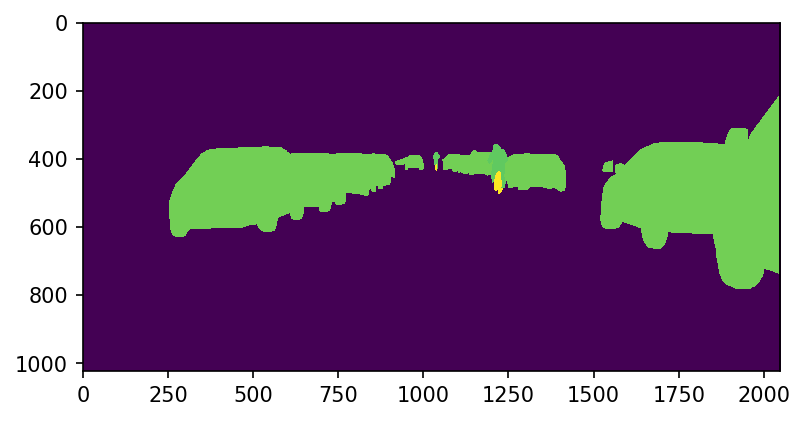

In [6]:
mask = Image.open(label_path)
mask = np.array(mask)

inst = Image.open(inst_path)
inst = np.array(inst)

plt.imshow(mask, interpolation='nearest')
plt.gcf().set_dpi(150)
plt.show()
plt.imshow(inst, interpolation='nearest')
plt.gcf().set_dpi(150)
plt.show()

In [7]:
np.unique(inst)

array([    1,     2,     3,     4,     7,     8,     9,    11,    13,
          17,    20,    21,    23,    26, 25000, 25001, 26000, 26001,
       26002, 26003, 26004, 26005, 26006, 26007, 26008, 26009, 26010,
       26011, 26012, 26013, 26014, 26015, 26016, 33000, 33001],
      dtype=int32)

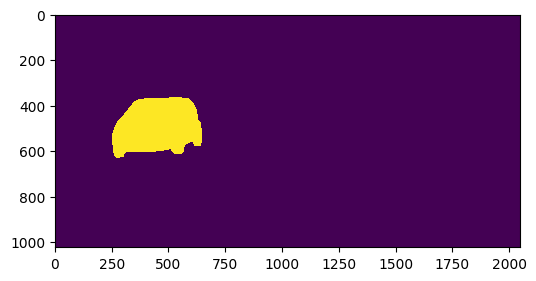

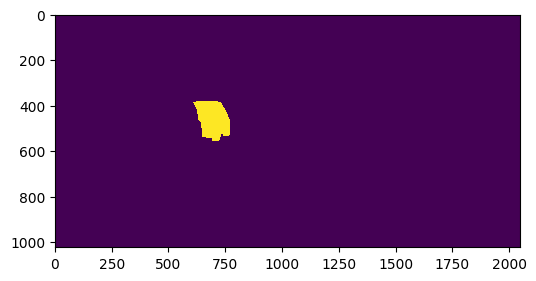

In [8]:
plt.imshow(inst == 26016, interpolation='nearest')
plt.gcf().set_dpi(100)
plt.show()
plt.imshow(inst == 26015, interpolation='nearest')
plt.gcf().set_dpi(100)
plt.show()

In [24]:
from pyEdgeEval.edge_tools.mask2edge_loop import (
    loop_mask2edge,
    loop_instance_mask2edge,
)
from pyEdgeEval.edge_tools.mask2edge_mp import (
    mp_mask2edge,
    mp_instance_mask2edge,
)
from pyEdgeEval.edge_tools.cityscapes.utils import (
    inst_labelIds,
)
from pyEdgeEval.utils import (
    mask_to_onehot,
)

In [10]:
num_ids = 34
m = mask_to_onehot(mask, num_ids)

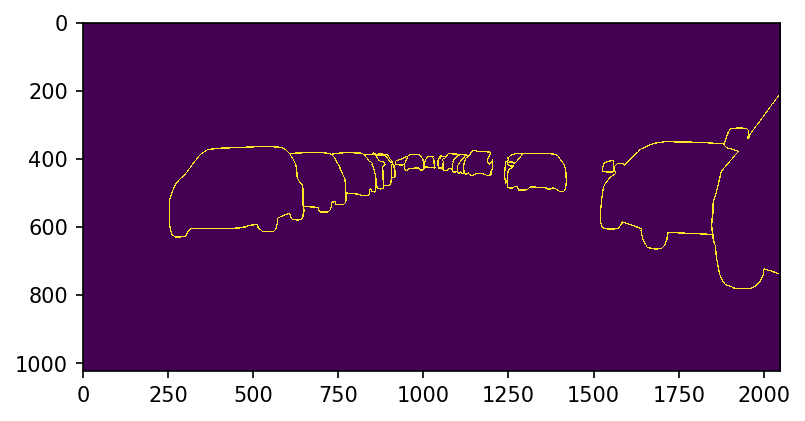

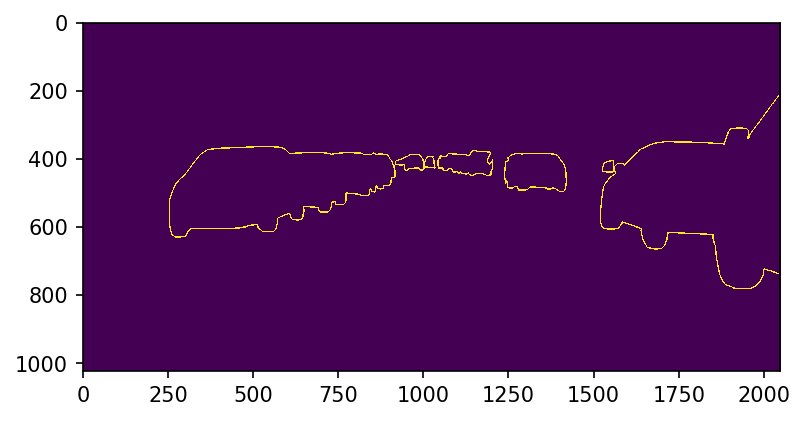

In [11]:
s_edges = loop_instance_mask2edge(
    mask=m,
    inst_mask=inst,
    inst_labelIds=inst_labelIds,
    radius=2,
    ignore_labelIds=[2, 3],
    use_cv2=True,
    quality=0,
)

plt.imshow(s_edges[26], interpolation='nearest')
plt.gcf().set_dpi(150)
plt.show()

is_edges = loop_mask2edge(
    mask=m,
    radius=2,
    ignore_labelIds=[2, 3],
    use_cv2=True,
    quality=0,
)

plt.imshow(is_edges[26], interpolation='nearest')
plt.gcf().set_dpi(150)
plt.show()

1. looping with cv2

In [12]:
%%timeit
_ = loop_instance_mask2edge(
    mask=m,
    inst_mask=inst,
    inst_labelIds=inst_labelIds,
    radius=2,
    ignore_labelIds=[2, 3],
    use_cv2=True,
    quality=0,
)

407 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


2. looping with scipy

In [13]:
%%timeit
_ = loop_instance_mask2edge(
    mask=m,
    inst_mask=inst,
    inst_labelIds=inst_labelIds,
    radius=2,
    ignore_labelIds=[2, 3],
    use_cv2=False,
    quality=0,
)

8.22 s ± 20.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


3. multiprocessing with cv2

In [48]:
%%timeit
_ = mp_instance_mask2edge(
    mask=m,
    inst_mask=inst,
    inst_labelIds=inst_labelIds,
    radius=2,
    ignore_labelIds=[2, 3],
    nproc=8,
    use_cv2=True,
    quality=0,
)

1.62 s ± 23.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


4. multiprocessing with scipy

In [54]:
%%timeit
_ = mp_instance_mask2edge(
    mask=m,
    inst_mask=inst,
    inst_labelIds=inst_labelIds,
    radius=2,
    ignore_labelIds=[2, 3],
    nproc=8,
    use_cv2=False,
    quality=0,
)

4.93 s ± 92.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


5. looping with cv2 (no instance)

In [64]:
%%timeit
_ = loop_mask2edge(
    mask=m,
    radius=2,
    ignore_labelIds=[2, 3],
    use_cv2=True,
    quality=0,
)

158 ms ± 1.37 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


6. looping with scipy (no instance)

In [63]:
%%timeit
_ = loop_mask2edge(
    mask=m,
    radius=2,
    ignore_labelIds=[2, 3],
    use_cv2=False,
    quality=0,
)

3.41 s ± 30 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


7. multiprocessing with cv2 (no instance)

In [59]:
%%timeit
_ = mp_mask2edge(
    mask=m,
    radius=2,
    ignore_labelIds=[2, 3],
    nproc=8,
    use_cv2=True,
    quality=0,
)

296 ms ± 4.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


8. multiprocessing with scipy (no instance)

In [61]:
%%timeit
_ = mp_mask2edge(
    mask=m,
    radius=2,
    ignore_labelIds=[2, 3],
    nproc=8,
    use_cv2=False,
    quality=0,
)

862 ms ± 15.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# compare results

True


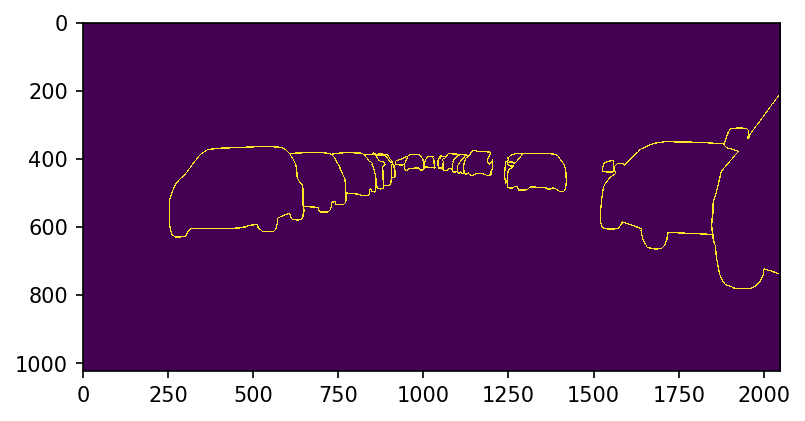

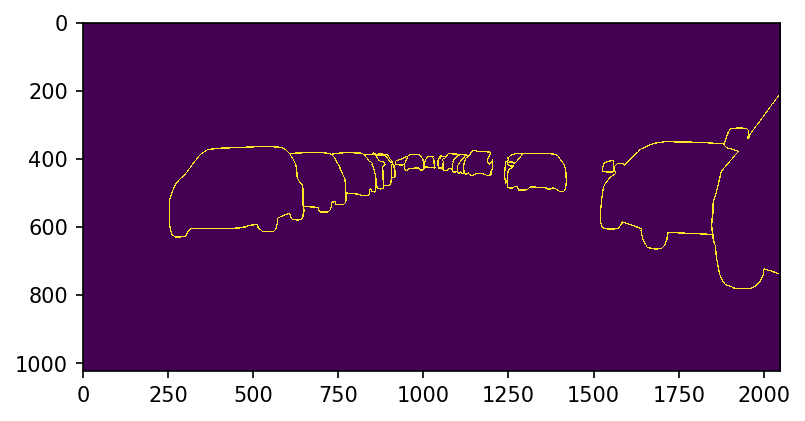

In [49]:
out_loop = loop_instance_mask2edge(
    mask=m,
    inst_mask=inst,
    inst_labelIds=inst_labelIds,
    radius=2,
    ignore_labelIds=[2, 3],
    use_cv2=True,
    quality=0,
)

out_mp = mp_instance_mask2edge(
    mask=m,
    inst_mask=inst,
    inst_labelIds=inst_labelIds,
    radius=2,
    ignore_labelIds=[2, 3],
    nproc=8,
    use_cv2=True,
    quality=0,
)

print((out_loop == out_mp).all())

plt.imshow(out_loop[26], interpolation='nearest')
plt.gcf().set_dpi(150)
plt.show()

plt.imshow(out_mp[26], interpolation='nearest')
plt.gcf().set_dpi(150)
plt.show()

True


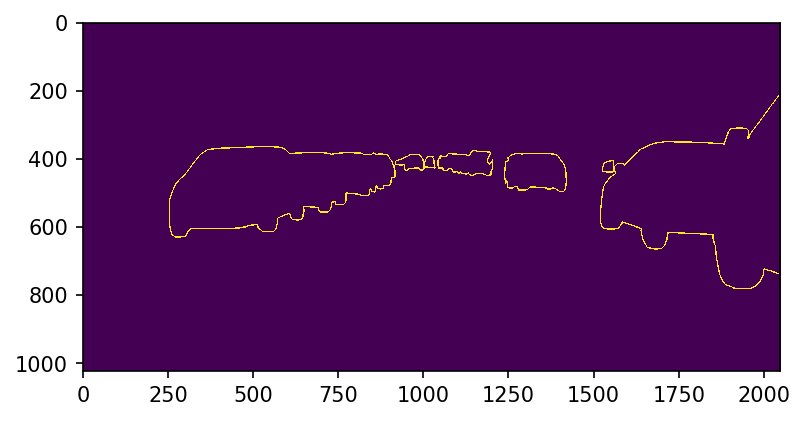

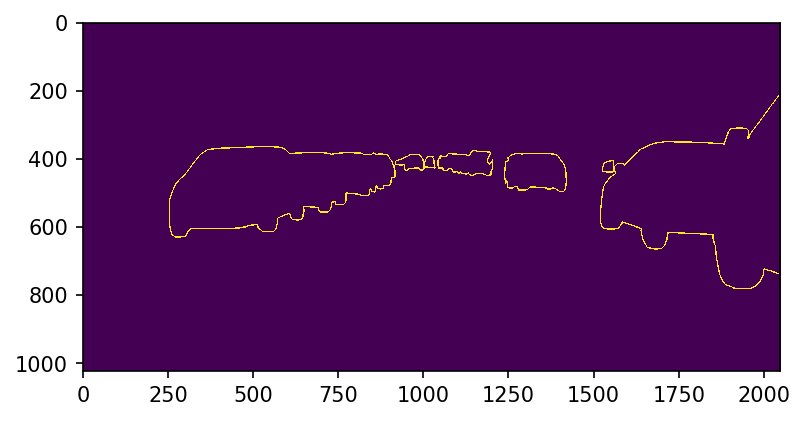

In [51]:
out_loop = loop_mask2edge(
    mask=m,
    radius=2,
    ignore_labelIds=[2, 3],
    use_cv2=True,
    quality=0,
)

out_mp = mp_mask2edge(
    mask=m,
    radius=2,
    ignore_labelIds=[2, 3],
    nproc=8,
    use_cv2=True,
    quality=0,
)

print((out_loop == out_mp).all())

plt.imshow(out_loop[26], interpolation='nearest')
plt.gcf().set_dpi(150)
plt.show()

plt.imshow(out_mp[26], interpolation='nearest')
plt.gcf().set_dpi(150)
plt.show()

True


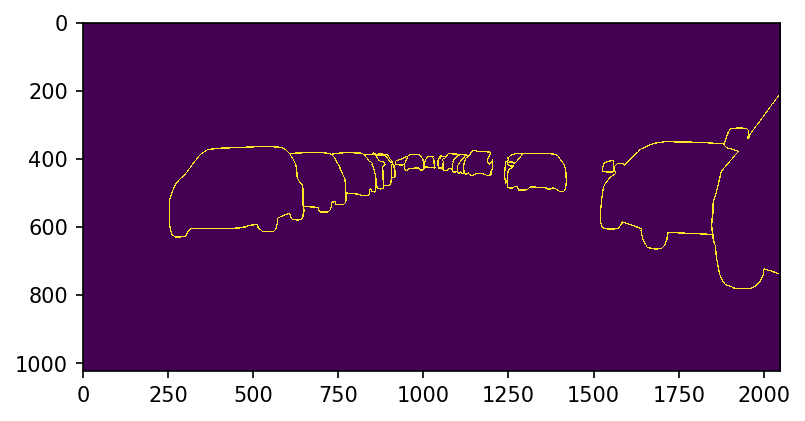

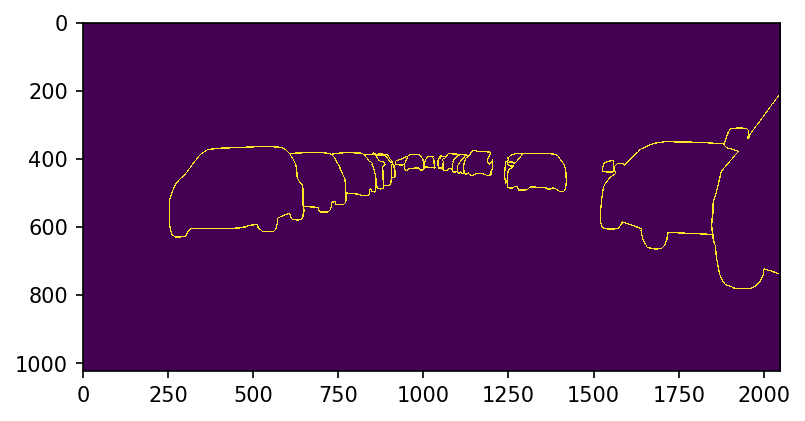

In [52]:
out_cv2 = loop_instance_mask2edge(
    mask=m,
    inst_mask=inst,
    inst_labelIds=inst_labelIds,
    radius=2,
    ignore_labelIds=[2, 3],
    use_cv2=True,
    quality=0,
)

out_scipy = loop_instance_mask2edge(
    mask=m,
    inst_mask=inst,
    inst_labelIds=inst_labelIds,
    radius=2,
    ignore_labelIds=[2, 3],
    use_cv2=False,
    quality=0,
)

print((out_cv2 == out_scipy).all())

plt.imshow(out_cv2[26], interpolation='nearest')
plt.gcf().set_dpi(150)
plt.show()

plt.imshow(out_scipy[26], interpolation='nearest')
plt.gcf().set_dpi(150)
plt.show()